# Capstone Project - Car Accidents Severity (Week 3)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem (week2)](#introduction)
* [Data understanding (week2)](#data)
* [Data preparation and analysis (week2)](#preparation)
* [Modeling (week3)](#modeling)
* [Evaluation (week3)](#evaluation)
* [Conclusion and deploying (week3)](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Car accidents cause still too many deaths. 90 people die every day in the U.S. from vehicle accidents. More than 6 million car accidents occur each year. According to the NHTSA, about 6% of all motor vehicle accidents in the United States result in at least one death. 3 million drivers suffer injuries and 2/3 of them have permanent injuries.

In order to reduce the number of car accidents and to save lives, car accident data and machine learning can be used to give drivers a better information about the risk to have a severe car accident in a certain area and under certain conditions like weather, road and visibility. Applications like Waze, Google Maps or Tom Tom GPS Navigation Traffic could usefully display this information to the drivers when crossing the area. 

The target audience is the drivers who can travel more safely thanks to a synthetic information about past car accidents in all the areas where the risk is important (corresponding to a severe car accident). All the drivers will certainly be interested in it. Mobility services will be the intermediate target using the information and displaying it. Insurance companies and public services may be ready to invest in such a project as safer drivers involves less accident expenses for them.

The information on car accidents will be based on a model predicting the severity of road accidents under conditions. The model will be based on classification algorithms (best solution when a labelled dataset is available). For this first modelling project, the data come from the SDOT Traffic Management Division in Seattle. Once the model completed and the prediction available, it can be used in Seattle. In a further version, datasets about other cities or states and additional features can also be integrated in the model to extend covered area and the improve prevision.


## Data understanding <a name="data"></a>

The dataset from the SDOT Traffic Management Division in Seattle presents the car accidents from 2004 till today (i.e 221525 car accidents) and their characteristics detailed in 40 columns. 
The first steps of the project will be the preparation/cleaning and analysis of the data (see dataframe).

Data preparation / cleaning : 
1. Many features of the database are not useful for the project. Unuseful features must be droped. A new dataframe will be created containing the following features : X, Y, SeverityCode, Injuries, Serious injuries, Fatalities, Incdate, Weather, Roadcond, Lightcond.
2. All rows will be checked in order to identify rows containing no data. Thoses rows will be droped.
3. Weather, Roadcond and Lightcond have sometimes missing data but also rows containing 'Unknown' or 'Other' which is unuseful data. Thoses rows have also to be droped.

After cleaning, the date frame contains 171434 rows and 11 columns

Analysis:
Data visualization tools will be used to better understand the data : 
1. Number of car accidents per year: after a short increase of car accidents in 2005 and 2006, car accidents decrease from 2006 till 2013. In 2014 and 2015, car accidents increased again. Since 2015, car accidents decrase from 10309 to less than 9000. The figures regarding 2020 are very low due to the fact that the year is not finished yet. A stronger decrease which means less injuries/fatalities and less cost could be reached thanks to use of new technologies i.e machine learning. This project may be one of them.
2. Analysis of severitycode: all the car accidents are characterized by a severitycode (1= property damage, 2 = injuriy, 2b = serious injury, 3 = fatality). Analysis of this data shows that most of the car accidents cause no injury/fatality.  On average, 26 car accidents cause fatalities. To build the model, data have to be balanced in order to have an equal representation of each severity type.
3. Impact of weather conditions: contrary to what one might think, rain, snow, overcast and crosswind are not the only weather conditions causing car accidents. Most of the accidents happen when the weather is clear. As well as weather conditions, road dans light conditions will also be integrated in the model. 

Next steps (week 3) will focus on modeling and model evaluation.


## Data preparation and analysis <a name="preparation"></a>

In [ ]:
## Downloading data from the csv file available on the open-source SDOT web site

In [1]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1.268354e+06,265256.609668,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,...,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,1.259316e+06,202173.388163,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,...,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,1.264342e+06,259613.000382,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,1.279221e+06,222017.872023,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,1.262205e+06,242179.124204,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [3]:
# print the dimensions of the dataframe
df_data_1.shape

(221525, 40)

### Preparation and Cleaning

In [4]:
# set OBJECTID as index of the dataframe
df_data_1.index = df_data_1['OBJECTID']
del df_data_1['OBJECTID']
df_data_1.head()

,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,1.268354e+06,265256.609668,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,,...,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
2,1.259316e+06,202173.388163,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,NaN,...,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
3,1.264342e+06,259613.000382,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
4,1.279221e+06,222017.872023,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
5,1.262205e+06,242179.124204,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [5]:
# drop unuseful features
df_data_1.drop(["INCKEY", "COLDETKEY", "INTKEY", "REPORTNO", "STATUS", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "SEVERITYDESC", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", 
                "COLLISIONTYPE", "INCDTTM", "JUNCTIONTYPE", "SDOT_COLCODE", "SDOT_COLDESC", "PEDROWNOTGRNT", "SDOTCOLNUM", "ST_COLCODE", "ST_COLDESC", "SEGLANEKEY", "CROSSWALKKEY", 
                "HITPARKEDCAR", "UNDERINFL", "INATTENTIONIND", "SPEEDING", "LOCATION", "ADDRTYPE" ], axis=1, inplace=True)
df_data_1.head()

,X,Y,SEVERITYCODE,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,WEATHER,ROADCOND,LIGHTCOND
OBJECTID,,,,,,,,,,
1,1.268354e+06,265256.609668,2,1,0,0,2013/03/14 00:00:00+00,Clear,Dry,Daylight
2,1.259316e+06,202173.388163,2,1,0,0,2006/01/15 00:00:00+00,Overcast,Dry,Dark - Street Lights On
3,1.264342e+06,259613.000382,1,0,0,0,2019/09/09 00:00:00+00,Overcast,Wet,Daylight
4,1.279221e+06,222017.872023,1,0,0,0,2019/12/19 00:00:00+00,NaN,NaN,NaN
5,1.262205e+06,242179.124204,0,0,0,0,2013/03/27 00:00:00+00,NaN,NaN,NaN


In [6]:
# check number of rows containing no data
print("number of NaN values for the column X :", df_data_1['X'].isnull().sum())
print("number of NaN values for the column Y :", df_data_1['Y'].isnull().sum())
print("number of NaN values for the column SEVERITYCODE :", df_data_1['SEVERITYCODE'].isnull().sum())
print("number of NaN values for the column INJURIES :", df_data_1['INJURIES'].isnull().sum())
print("number of NaN values for the column SERIOUSINJURIES :", df_data_1['SERIOUSINJURIES'].isnull().sum())
print("number of NaN values for the column FATALITIES :", df_data_1['FATALITIES'].isnull().sum())
print("number of NaN values for the column INCDATE :", df_data_1['INCDATE'].isnull().sum())

number of NaN values for the column X : 7475
number of NaN values for the column Y : 7475
number of NaN values for the column SEVERITYCODE : 1
number of NaN values for the column INJURIES : 0
number of NaN values for the column SERIOUSINJURIES : 0
number of NaN values for the column FATALITIES : 0
number of NaN values for the column INCDATE : 0


In [7]:
# drop rows containing no data for X, Y and SEVERITYCODE
df_data_1.dropna(subset=['X'], inplace=True)
df_data_1.dropna(subset=['Y'], inplace=True)
df_data_1.dropna(subset=['SEVERITYCODE'], inplace=True)

In [8]:
# clean column concerning WEATHER
Weather_result = df_data_1.WEATHER.value_counts()        
print(Weather_result)

Clear                       112509
Raining                      32898
Overcast                     27961
Unknown                      13933
Snowing                        906
Other                          801
Fog/Smog/Smoke                 561
Sleet/Hail/Freezing Rain       115
Blowing Sand/Dirt               50
Severe Crosswind                25
Partly Cloudy                   10
Blowing Snow                     1
Name: WEATHER, dtype: int64


In [9]:
# Most of the accidents take place under clear weather. Rain and overcast are also factors of car accidents. 
# 13933 rows have no information ("unkown") regarding the weather and 801 have "other" as weather equivalent to "Unkonwn". 
# They have to be excluded from our database as well as the rows containing no data (NaN).

df_data_1['WEATHER'].replace(['Unknown'], 'NaN', inplace=True)
df_data_1['WEATHER'].replace(['Other'], 'NaN', inplace=True)    
df_data_1.dropna(subset=['WEATHER'], inplace=True)
indexNames = df_data_1[ df_data_1['WEATHER'] == 'NaN' ].index
df_data_1.drop(indexNames , inplace=True)
Weather_result2 = df_data_1.WEATHER.value_counts()   
print(Weather_result2)

Clear                       112509
Raining                      32898
Overcast                     27961
Snowing                        906
Fog/Smog/Smoke                 561
Sleet/Hail/Freezing Rain       115
Blowing Sand/Dirt               50
Severe Crosswind                25
Partly Cloudy                   10
Blowing Snow                     1
Name: WEATHER, dtype: int64


In [10]:
# same process to clean the column ROADCOND 
df_data_1['ROADCOND'].replace(['Unknown'], 'NaN', inplace=True)
df_data_1['ROADCOND'].replace(['Other'], 'NaN', inplace=True)    
df_data_1.dropna(subset=['ROADCOND'], inplace=True)
indexNames = df_data_1[ df_data_1['ROADCOND'] == 'NaN' ].index
df_data_1.drop(indexNames , inplace=True)
RoadCond_result = df_data_1.ROADCOND.value_counts()   
print(RoadCond_result)

Dry               125014
Wet                46801
Ice                 1108
Snow/Slush           898
Standing Water        99
Sand/Mud/Dirt         58
Oil                   49
Name: ROADCOND, dtype: int64


In [11]:
# same process to clean the column LIGHTCOND 
df_data_1['LIGHTCOND'].replace(['Unknown'], 'NaN', inplace=True)
df_data_1['LIGHTCOND'].replace(['Other'], 'NaN', inplace=True)    
df_data_1.dropna(subset=['LIGHTCOND'], inplace=True)
indexNames = df_data_1[ df_data_1['LIGHTCOND'] == 'NaN' ].index
df_data_1.drop(indexNames , inplace=True)
LightCond_result = df_data_1.LIGHTCOND.value_counts()   
print(LightCond_result)

Daylight                    113597
Dark - Street Lights On      47192
Dusk                          5704
Dawn                          2439
Dark - No Street Lights       1375
Dark - Street Lights Off      1110
Dark - Unknown Lighting         17
Name: LIGHTCOND, dtype: int64


In [12]:
df_data_1.shape

(171434, 10)

In [13]:
# Create a new column with year from the INCDATE feature
df_data_1.insert(2, "YEAR", df_data_1['INCDATE'], True) 
df_data_1['YEAR'] = pd.DatetimeIndex(df_data_1['INCDATE']).year
df_data_1.head()

,X,Y,YEAR,SEVERITYCODE,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,WEATHER,ROADCOND,LIGHTCOND
OBJECTID,,,,,,,,,,,
1,1.268354e+06,265256.609668,2013,2,1,0,0,2013/03/14 00:00:00+00,Clear,Dry,Daylight
2,1.259316e+06,202173.388163,2006,2,1,0,0,2006/01/15 00:00:00+00,Overcast,Dry,Dark - Street Lights On
3,1.264342e+06,259613.000382,2019,1,0,0,0,2019/09/09 00:00:00+00,Overcast,Wet,Daylight
6,1.272291e+06,260737.144511,2005,2,1,0,0,2005/07/07 00:00:00+00,Clear,Dry,Daylight
7,1.269243e+06,231901.439394,2020,1,0,0,0,2020/07/31 00:00:00+00,Clear,Dry,Daylight


In [14]:
df_data_1.dtypes

X                  float64
Y                  float64
YEAR                 int64
SEVERITYCODE        object
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
dtype: object

### Data analysis

In [15]:
# Analysis the the car accidents by year 
df_data_year = df_data_1[['YEAR', 'SEVERITYCODE']]
df_data_year['YEAR']=df_data_year['YEAR'].astype ("int") 
df_data_year.set_index('YEAR', inplace=True)
df_data_year.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,SEVERITYCODE
YEAR,
2013,2
2006,2
2019,1
2005,2
2020,1


In [16]:
df_data_year.columns.tolist()

['SEVERITYCODE']

In [17]:
df_data_year.index.tolist()

[2013,
 2006,
 2019,
 2005,
 2020,
 2006,
 2013,
 2013,
 2013,
 2019,
 2007,
 2004,
 2019,
 2013,
 2020,
 2019,
 2019,
 2013,
 2013,
 2005,
 2019,
 2006,
 2004,
 2005,
 2005,
 2019,
 2013,
 2006,
 2019,
 2019,
 2005,
 2020,
 2004,
 2005,
 2007,
 2019,
 2013,
 2006,
 2020,
 2019,
 2013,
 2019,
 2007,
 2004,
 2006,
 2004,
 2019,
 2013,
 2013,
 2004,
 2019,
 2006,
 2005,
 2006,
 2013,
 2004,
 2004,
 2006,
 2020,
 2019,
 2013,
 2013,
 2013,
 2005,
 2005,
 2005,
 2007,
 2013,
 2019,
 2005,
 2019,
 2013,
 2020,
 2006,
 2006,
 2019,
 2019,
 2006,
 2013,
 2006,
 2019,
 2020,
 2019,
 2013,
 2005,
 2008,
 2013,
 2019,
 2006,
 2005,
 2006,
 2013,
 2013,
 2013,
 2005,
 2019,
 2005,
 2005,
 2004,
 2019,
 2013,
 2019,
 2019,
 2020,
 2004,
 2006,
 2005,
 2019,
 2013,
 2005,
 2020,
 2006,
 2019,
 2006,
 2019,
 2019,
 2006,
 2020,
 2005,
 2004,
 2005,
 2012,
 2020,
 2020,
 2019,
 2019,
 2013,
 2006,
 2005,
 2013,
 2019,
 2005,
 2005,
 2004,
 2013,
 2006,
 2013,
 2006,
 2019,
 2005,
 2005,
 2005,
 2019,

In [18]:
df_data_year = pd.get_dummies(df_data_year, columns=['SEVERITYCODE'])
df_data_year.head()

,SEVERITYCODE_0,SEVERITYCODE_1,SEVERITYCODE_2,SEVERITYCODE_2b,SEVERITYCODE_3
YEAR,,,,,
2013,0,0,1,0,0
2006,0,0,1,0,0
2019,0,1,0,0,0
2005,0,0,1,0,0
2020,0,1,0,0,0


In [19]:
df_data_year.sum(axis=1)
df_data_year.head()

,SEVERITYCODE_0,SEVERITYCODE_1,SEVERITYCODE_2,SEVERITYCODE_2b,SEVERITYCODE_3
YEAR,,,,,
2013,0,0,1,0,0
2006,0,0,1,0,0
2019,0,1,0,0,0
2005,0,0,1,0,0
2020,0,1,0,0,0


In [20]:
df_data_year = df_data_year.groupby(['YEAR'])["SEVERITYCODE_0", "SEVERITYCODE_1", "SEVERITYCODE_2", "SEVERITYCODE_2b", "SEVERITYCODE_3"].sum(inplace=True)
df_data_year.head()

,SEVERITYCODE_0,SEVERITYCODE_1,SEVERITYCODE_2,SEVERITYCODE_2b,SEVERITYCODE_3
YEAR,,,,,
2004,0,7178,3521,211,30
2005,0,9207,4245,198,25
2006,0,9391,4129,278,33
2007,0,8861,3830,233,13
2008,0,7979,3552,187,20


In [21]:
df_data_year2 = df_data_year
df_data_year2['Total']=df_data_year2.sum(axis=1)
df_data_year2.head()

,SEVERITYCODE_0,SEVERITYCODE_1,SEVERITYCODE_2,SEVERITYCODE_2b,SEVERITYCODE_3,Total
YEAR,,,,,,
2004,0,7178,3521,211,30,10940
2005,0,9207,4245,198,25,13675
2006,0,9391,4129,278,33,13831
2007,0,8861,3830,233,13,12937
2008,0,7979,3552,187,20,11738


In [22]:
df_data_year2.drop(["SEVERITYCODE_0", "SEVERITYCODE_1", "SEVERITYCODE_2", "SEVERITYCODE_2b", "SEVERITYCODE_3"], axis=1, inplace=True)
df_data_year2.head(17)

,Total
YEAR,
2004,10940
2005,13675
2006,13831
2007,12937
2008,11738
2009,9860
2010,9357
2011,9207
2012,9454


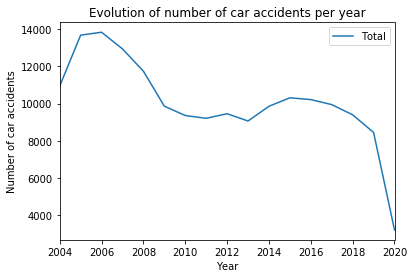

In [23]:
import matplotlib as mpl
import numpy as np

df_data_year2.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Number of car accidents')
plt.title('Evolution of number of car accidents per year')

plt.show()

In [24]:
# Analysis the the car accidents by year and severitycode
df_data_year3 = df_data_1[['YEAR', 'SEVERITYCODE']]
df_data_year3['YEAR']=df_data_year3['YEAR'].astype ("int") 
df_data_year3.set_index('YEAR', inplace=True)
df_data_year3.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,SEVERITYCODE
YEAR,
2013,2
2006,2
2019,1
2005,2
2020,1


In [25]:
df_data_year3.columns.tolist()
df_data_year3.index.tolist()

[2013,
 2006,
 2019,
 2005,
 2020,
 2006,
 2013,
 2013,
 2013,
 2019,
 2007,
 2004,
 2019,
 2013,
 2020,
 2019,
 2019,
 2013,
 2013,
 2005,
 2019,
 2006,
 2004,
 2005,
 2005,
 2019,
 2013,
 2006,
 2019,
 2019,
 2005,
 2020,
 2004,
 2005,
 2007,
 2019,
 2013,
 2006,
 2020,
 2019,
 2013,
 2019,
 2007,
 2004,
 2006,
 2004,
 2019,
 2013,
 2013,
 2004,
 2019,
 2006,
 2005,
 2006,
 2013,
 2004,
 2004,
 2006,
 2020,
 2019,
 2013,
 2013,
 2013,
 2005,
 2005,
 2005,
 2007,
 2013,
 2019,
 2005,
 2019,
 2013,
 2020,
 2006,
 2006,
 2019,
 2019,
 2006,
 2013,
 2006,
 2019,
 2020,
 2019,
 2013,
 2005,
 2008,
 2013,
 2019,
 2006,
 2005,
 2006,
 2013,
 2013,
 2013,
 2005,
 2019,
 2005,
 2005,
 2004,
 2019,
 2013,
 2019,
 2019,
 2020,
 2004,
 2006,
 2005,
 2019,
 2013,
 2005,
 2020,
 2006,
 2019,
 2006,
 2019,
 2019,
 2006,
 2020,
 2005,
 2004,
 2005,
 2012,
 2020,
 2020,
 2019,
 2019,
 2013,
 2006,
 2005,
 2013,
 2019,
 2005,
 2005,
 2004,
 2013,
 2006,
 2013,
 2006,
 2019,
 2005,
 2005,
 2005,
 2019,

In [26]:
df_data_year3 = pd.get_dummies(df_data_year3, columns=['SEVERITYCODE'])
df_data_year3.head()

,SEVERITYCODE_0,SEVERITYCODE_1,SEVERITYCODE_2,SEVERITYCODE_2b,SEVERITYCODE_3
YEAR,,,,,
2013,0,0,1,0,0
2006,0,0,1,0,0
2019,0,1,0,0,0
2005,0,0,1,0,0
2020,0,1,0,0,0


In [27]:
df_data_year3.sum(axis=1)
df_data_year3.head()

,SEVERITYCODE_0,SEVERITYCODE_1,SEVERITYCODE_2,SEVERITYCODE_2b,SEVERITYCODE_3
YEAR,,,,,
2013,0,0,1,0,0
2006,0,0,1,0,0
2019,0,1,0,0,0
2005,0,0,1,0,0
2020,0,1,0,0,0


In [28]:
df_data_year3 = df_data_year3.groupby(['YEAR'])["SEVERITYCODE_0", "SEVERITYCODE_1", "SEVERITYCODE_2", "SEVERITYCODE_2b", "SEVERITYCODE_3"].sum(inplace=True)
df_data_year3.head(17)

,SEVERITYCODE_0,SEVERITYCODE_1,SEVERITYCODE_2,SEVERITYCODE_2b,SEVERITYCODE_3
YEAR,,,,,
2004,0,7178,3521,211,30
2005,0,9207,4245,198,25
2006,0,9391,4129,278,33
2007,0,8861,3830,233,13
2008,0,7979,3552,187,20
2009,0,6406,3237,193,24
2010,0,6081,3092,168,16
2011,0,6096,2965,137,9
2012,1,6086,3179,170,18


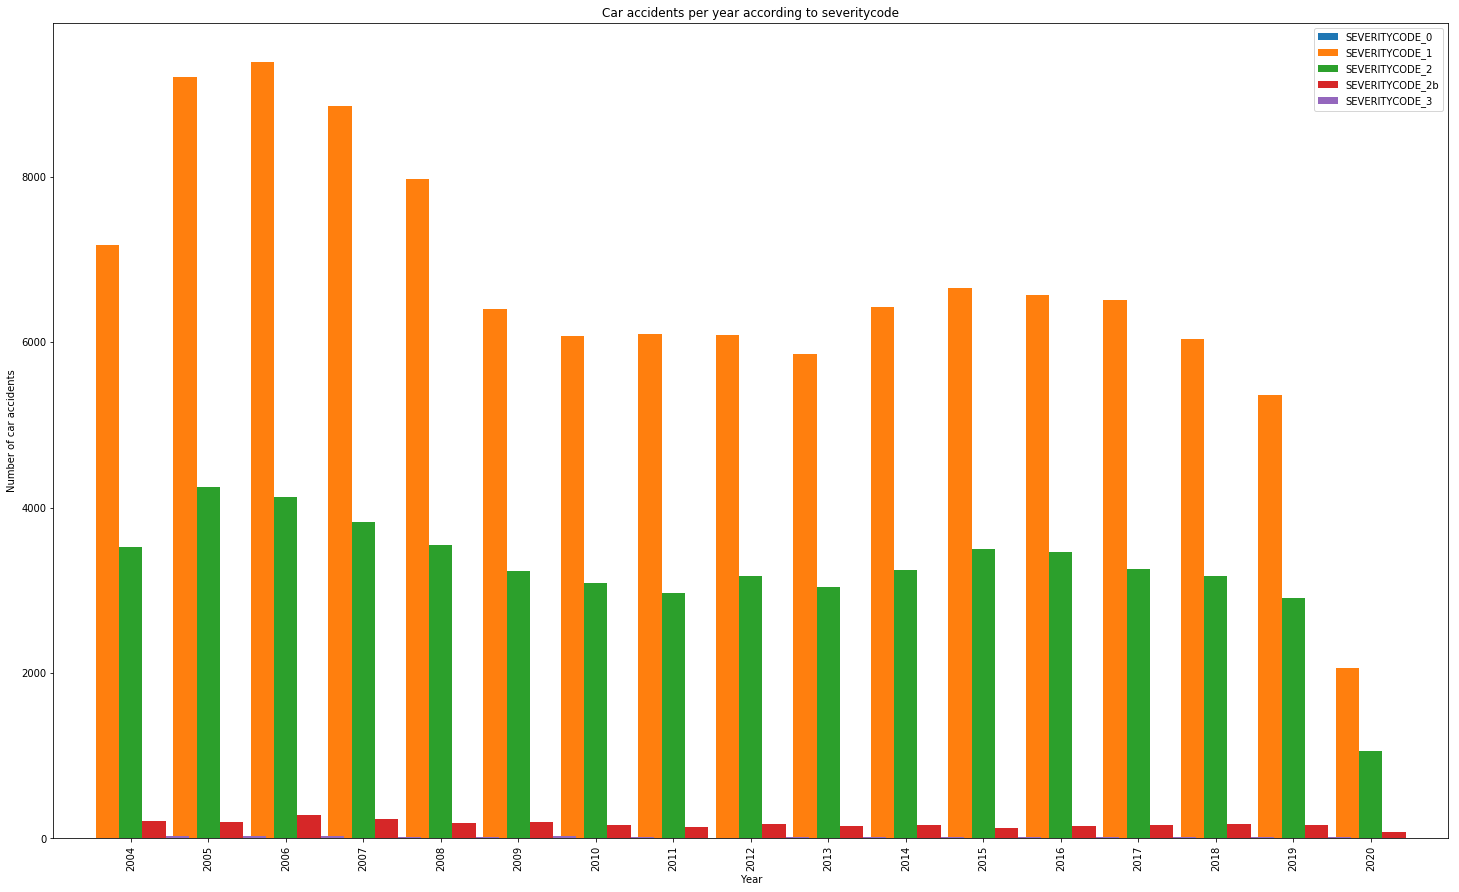

In [29]:
import matplotlib as mpl
import numpy as np

df_data_year3.plot(kind='bar', figsize=(25, 15),width=1.5, rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of car accidents')
plt.title('Car accidents per year according to severitycode')

plt.show()

In [30]:
# Analysis the the car accidents by year and weather conditions
df_weather_viz = df_data_1[['YEAR', 'WEATHER']]
df_weather_viz['YEAR']=df_weather_viz['YEAR'].astype ("int") 
df_weather_viz.set_index('YEAR', inplace=True)
df_weather_viz.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,WEATHER
YEAR,
2013,Clear
2006,Overcast
2019,Overcast
2005,Clear
2020,Clear


In [31]:
df_weather_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171434 entries, 2013 to 2019
Data columns (total 1 columns):
WEATHER    171434 non-null object
dtypes: object(1)
memory usage: 2.6+ MB


In [32]:
df_weather_viz.columns.values

array(['WEATHER'], dtype=object)

In [33]:
df_weather_viz.columns.tolist()

['WEATHER']

In [34]:
df_weather_viz.index.values

array([2013, 2006, 2019, ..., 2019, 2019, 2019])

In [35]:
df_weather_viz.index.tolist()

[2013,
 2006,
 2019,
 2005,
 2020,
 2006,
 2013,
 2013,
 2013,
 2019,
 2007,
 2004,
 2019,
 2013,
 2020,
 2019,
 2019,
 2013,
 2013,
 2005,
 2019,
 2006,
 2004,
 2005,
 2005,
 2019,
 2013,
 2006,
 2019,
 2019,
 2005,
 2020,
 2004,
 2005,
 2007,
 2019,
 2013,
 2006,
 2020,
 2019,
 2013,
 2019,
 2007,
 2004,
 2006,
 2004,
 2019,
 2013,
 2013,
 2004,
 2019,
 2006,
 2005,
 2006,
 2013,
 2004,
 2004,
 2006,
 2020,
 2019,
 2013,
 2013,
 2013,
 2005,
 2005,
 2005,
 2007,
 2013,
 2019,
 2005,
 2019,
 2013,
 2020,
 2006,
 2006,
 2019,
 2019,
 2006,
 2013,
 2006,
 2019,
 2020,
 2019,
 2013,
 2005,
 2008,
 2013,
 2019,
 2006,
 2005,
 2006,
 2013,
 2013,
 2013,
 2005,
 2019,
 2005,
 2005,
 2004,
 2019,
 2013,
 2019,
 2019,
 2020,
 2004,
 2006,
 2005,
 2019,
 2013,
 2005,
 2020,
 2006,
 2019,
 2006,
 2019,
 2019,
 2006,
 2020,
 2005,
 2004,
 2005,
 2012,
 2020,
 2020,
 2019,
 2019,
 2013,
 2006,
 2005,
 2013,
 2019,
 2005,
 2005,
 2004,
 2013,
 2006,
 2013,
 2006,
 2019,
 2005,
 2005,
 2005,
 2019,

In [36]:
df_weather_viz = pd.get_dummies(df_weather_viz, columns=['WEATHER'])
df_weather_viz.head()

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing
YEAR,,,,,,,,,
2013,0,1,0,0,0,0,0,0,0
2006,0,0,0,1,0,0,0,0,0
2019,0,0,0,1,0,0,0,0,0
2005,0,1,0,0,0,0,0,0,0
2020,0,1,0,0,0,0,0,0,0


In [37]:
df_weather_viz.sum(axis=1)
df_weather_viz.head()

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing
YEAR,,,,,,,,,
2013,0,1,0,0,0,0,0,0,0
2006,0,0,0,1,0,0,0,0,0
2019,0,0,0,1,0,0,0,0,0
2005,0,1,0,0,0,0,0,0,0
2020,0,1,0,0,0,0,0,0,0


In [38]:
df_weather_viz = df_weather_viz.groupby(['YEAR'])["WEATHER_Blowing Sand/Dirt", "WEATHER_Clear", "WEATHER_Fog/Smog/Smoke", "WEATHER_Overcast", "WEATHER_Partly Cloudy", 
                                 "WEATHER_Raining", "WEATHER_Severe Crosswind", "WEATHER_Sleet/Hail/Freezing Rain", "WEATHER_Snowing"].sum(inplace=True)
df_weather_viz.head(17)

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing
YEAR,,,,,,,,,
2004,4,7074,40,1772,0,2007,1,5,37
2005,4,8929,57,2177,0,2454,1,16,37
2006,2,8772,24,2110,0,2859,3,10,51
2007,6,8169,37,2272,0,2348,3,9,93
2008,4,7365,12,2130,0,2057,2,15,153
2009,1,6663,37,1428,0,1663,0,13,55
2010,1,5610,11,1445,0,2234,0,0,56
2011,1,5631,14,1715,0,1801,1,7,37
2012,0,5778,10,1526,0,2075,0,9,56


In [39]:
df_weather_viz.describe()

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2.470588,6485.529412,32.058824,1599.529412,0.588235,1907.764706,1.470588,6.411765,48.529412
std,2.348341,1569.624323,24.151787,409.534968,2.425356,488.113656,1.504894,5.196860,35.768558
min,0.000000,1906.000000,2.000000,621.000000,0.000000,645.000000,0.000000,0.000000,1.000000
25%,1.000000,5778.000000,12.000000,1420.000000,0.000000,1727.000000,0.000000,2.000000,25.000000
50%,1.000000,6469.000000,29.000000,1526.000000,0.000000,1979.000000,1.000000,5.000000,37.000000
75%,4.000000,7074.000000,49.000000,1772.000000,0.000000,2075.000000,3.000000,10.000000,56.000000
max,8.000000,8929.000000,94.000000,2272.000000,10.000000,2859.000000,5.000000,16.000000,153.000000


In [40]:
df_weather_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2004 to 2020
Data columns (total 9 columns):
WEATHER_Blowing Sand/Dirt           17 non-null uint8
WEATHER_Clear                       17 non-null int64
WEATHER_Fog/Smog/Smoke              17 non-null uint8
WEATHER_Overcast                    17 non-null int64
WEATHER_Partly Cloudy               17 non-null uint8
WEATHER_Raining                     17 non-null int64
WEATHER_Severe Crosswind            17 non-null uint8
WEATHER_Sleet/Hail/Freezing Rain    17 non-null uint8
WEATHER_Snowing                     17 non-null uint8
dtypes: int64(3), uint8(6)
memory usage: 646.0 bytes


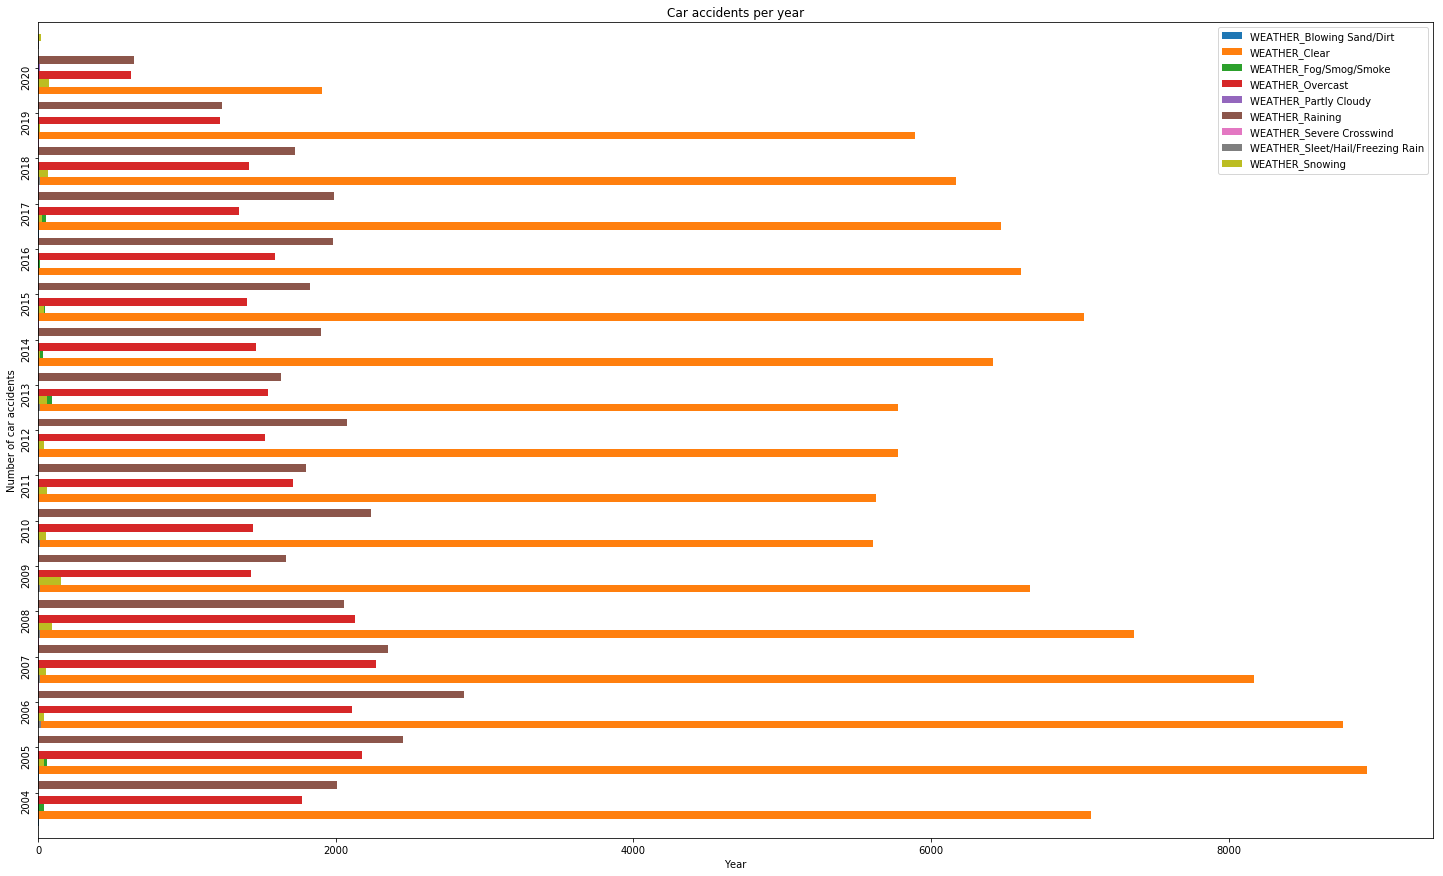

In [41]:
import matplotlib as mpl
import numpy as np

df_weather_viz.plot(kind='barh', figsize=(25, 15),width=1.5, rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of car accidents')
plt.title('Car accidents per year')

plt.show()

## Modeling <a name="introduction"></a>

In [15]:
df_data_1.head()

,X,Y,YEAR,SEVERITYCODE,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,WEATHER,ROADCOND,LIGHTCOND
OBJECTID,,,,,,,,,,,
1,1.268354e+06,265256.609668,2013,2,1,0,0,2013/03/14 00:00:00+00,Clear,Dry,Daylight
2,1.259316e+06,202173.388163,2006,2,1,0,0,2006/01/15 00:00:00+00,Overcast,Dry,Dark - Street Lights On
3,1.264342e+06,259613.000382,2019,1,0,0,0,2019/09/09 00:00:00+00,Overcast,Wet,Daylight
6,1.272291e+06,260737.144511,2005,2,1,0,0,2005/07/07 00:00:00+00,Clear,Dry,Daylight
7,1.269243e+06,231901.439394,2020,1,0,0,0,2020/07/31 00:00:00+00,Clear,Dry,Daylight


In [16]:
Severitycode_result = df_data_1.SEVERITYCODE.value_counts()   
print(Severitycode_result)

1     112769
2      55405
2b      2933
3        325
0          2
Name: SEVERITYCODE, dtype: int64


In [17]:
# Drop the 2 rows (Severitycode=3) which are not reprensentative of fatalities
df_data_1['SEVERITYCODE'].replace(['0'], 'NaN', inplace=True)    
df_data_1.dropna(subset=['SEVERITYCODE'], inplace=True)
indexNames = df_data_1[ df_data_1['SEVERITYCODE'] == 'NaN' ].index
df_data_1.drop(indexNames , inplace=True)

In [18]:
Severitycode_result = df_data_1.SEVERITYCODE.value_counts()   
print(Severitycode_result)

1     112769
2      55405
2b      2933
3        325
Name: SEVERITYCODE, dtype: int64


In [19]:
# Feature befor One Hot Encoding
df_data_1[['WEATHER','ROADCOND','LIGHTCOND']].head()

,WEATHER,ROADCOND,LIGHTCOND
OBJECTID,,,
1,Clear,Dry,Daylight
2,Overcast,Dry,Dark - Street Lights On
3,Overcast,Wet,Daylight
6,Clear,Dry,Daylight
7,Clear,Dry,Daylight


In [20]:
# Convert categorical variables to binary variables and append them to the feature Data Frame (One hot encoding)
Feature = df_data_1[['WEATHER','ROADCOND','LIGHTCOND', 'SEVERITYCODE']]
Feature = pd.concat([Feature,pd.get_dummies(df_data_1['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_data_1['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_data_1['LIGHTCOND'])], axis=1)
Feature['SEVERITYCODE'].replace(['3'], '4', inplace=True)   
Feature['SEVERITYCODE'].replace(['2b'], '3', inplace=True)   
Feature.drop(['WEATHER','ROADCOND','LIGHTCOND'], axis = 1,inplace=True)
Feature.head()

,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


SEVERITYCODE=0: 112769
SEVERITYCODE=1: 55405
SEVERITYCODE=2: 2933
SEVERITYCODE=2b: 325


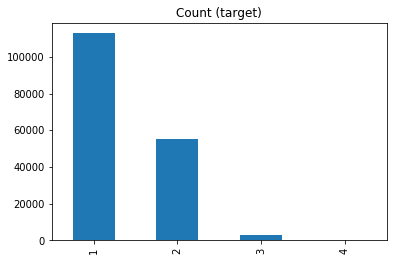

In [21]:
target_count = Feature.SEVERITYCODE.value_counts()
print('SEVERITYCODE=0:', target_count[0])
print('SEVERITYCODE=1:', target_count[1])
print('SEVERITYCODE=2:', target_count[2])
print('SEVERITYCODE=2b:', target_count[3])

target_count.plot(kind='bar', title='Count (target)');

In [22]:
Severitycode2_result = Feature.SEVERITYCODE.value_counts()   
print(Severitycode2_result)

1    112769
2     55405
3      2933
4       325
Name: SEVERITYCODE, dtype: int64


In [23]:
!pip install imblearn

Class=1, n=112769 (25.000%)
Class=0, n=112769 (25.000%)
Class=3, n=112769 (25.000%)
Class=2, n=112769 (25.000%)


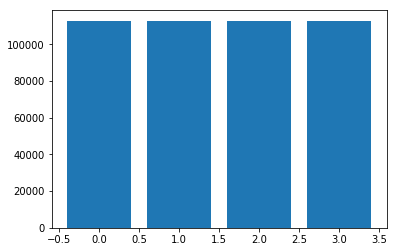

In [23]:
# We oversample the data in order to balance the main classes (Severitycode = 0 to 2b)
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

data = Feature
# split into input and output elements
X = Feature.drop(['SEVERITYCODE'], axis=1, inplace=False)
y = Feature['SEVERITYCODE']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [24]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE
X, y = make_classification(n_classes=4, class_sep=4,
            weights=None, n_informative=3, n_redundant=1, flip_y=0,
            n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
# Original dataset shape Counter({1: 900, 0: 100})
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
# Resampled dataset shape Counter({0: 100, 1: 100})

Original dataset shape Counter({2: 250, 0: 250, 1: 250, 3: 250})
Resampled dataset shape Counter({0: 250, 1: 250, 2: 250, 3: 250})


In [ ]:
# I will now use the following algorithms to built the accurate model

### K Nearest Neighbor(KNN)

In [25]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 20) (800,)
Test set: (200, 20) (200,)


In [27]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 2
neigh2 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat2 = neigh2.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh2.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))

Train set Accuracy:  1.0
Test set Accuracy:  0.995


In [28]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.995, 0.995, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ])

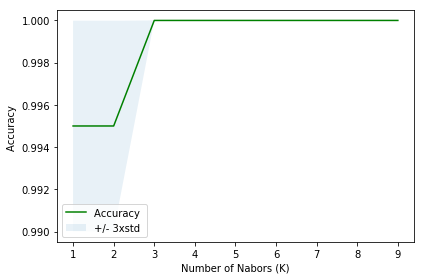

In [29]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [30]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 3


In [69]:
k = 2
KNNneigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNNyhat = KNNneigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNNneigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, KNNyhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.995


In [70]:
from sklearn.metrics import jaccard_score
KNNJaccard = jaccard_score(y_test, KNNyhat, average='weighted')
print(KNNJaccard)

0.9900961538461539


In [71]:
from sklearn.metrics import f1_score
KNN_F1_score = f1_score(y_test, KNNyhat, average='weighted') 
print(KNN_F1_score)

0.9949984986487839


### Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 100)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [78]:
DTyhat = DT_model.predict(X_test)
DTyhat

array([2, 2, 3, 3, 2, 3, 3, 3, 3, 0, 2, 1, 3, 0, 0, 3, 2, 2, 1, 3, 3, 3,
       0, 1, 0, 0, 2, 0, 3, 2, 2, 0, 3, 1, 1, 1, 2, 3, 0, 2, 3, 0, 1, 3,
       3, 2, 3, 0, 0, 2, 1, 3, 2, 0, 1, 0, 0, 3, 2, 3, 2, 0, 0, 2, 3, 2,
       0, 3, 0, 3, 0, 1, 2, 3, 1, 0, 1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       2, 0, 2, 2, 0, 3, 0, 1, 1, 2, 1, 1, 0, 1, 3, 0, 3, 0, 1, 0, 1, 2,
       3, 0, 2, 0, 3, 2, 0, 3, 2, 1, 0, 2, 0, 1, 3, 3, 2, 3, 2, 1, 0, 0,
       0, 0, 2, 0, 3, 3, 0, 0, 1, 3, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 3, 2,
       3, 3, 0, 2, 1, 1, 1, 2, 2, 3, 3, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1,
       1, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2, 3, 1, 2, 1, 1, 3, 0, 3, 2,
       3, 0])

In [79]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, DTyhat))

DecisionTrees's Accuracy:  1.0


In [80]:
from sklearn.metrics import jaccard_score
DTJaccard = jaccard_score(y_test, DTyhat, average='weighted')
print(DTJaccard)

1.0


In [81]:
from sklearn.metrics import f1_score
DT_F1_score = f1_score(y_test, DTyhat, average='weighted') 
print(DT_F1_score)

1.0


### Support Vector Machine

In [48]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

SVC()

In [49]:
SVMyhat = SVM_model.predict(X_test)
SVMyhat

array([2, 2, 3, 3, 2, 3, 3, 3, 3, 0, 2, 1, 3, 0, 0, 3, 2, 2, 1, 3, 3, 3,
       0, 1, 0, 0, 2, 0, 3, 2, 2, 0, 3, 1, 1, 1, 2, 3, 0, 2, 3, 0, 1, 3,
       3, 2, 3, 0, 0, 2, 1, 3, 2, 0, 1, 0, 0, 3, 2, 3, 2, 0, 0, 2, 3, 2,
       0, 3, 0, 3, 0, 1, 2, 3, 1, 0, 1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       2, 0, 2, 2, 0, 3, 0, 1, 1, 2, 1, 1, 0, 1, 3, 0, 3, 0, 1, 0, 1, 2,
       3, 0, 2, 0, 3, 2, 0, 3, 2, 1, 0, 2, 0, 1, 3, 3, 2, 3, 2, 1, 0, 0,
       0, 0, 2, 0, 3, 3, 0, 0, 1, 3, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 3, 2,
       3, 3, 0, 2, 1, 1, 1, 2, 2, 3, 3, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1,
       1, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2, 3, 1, 2, 1, 1, 3, 0, 3, 2,
       3, 0])

In [50]:
from sklearn.metrics import f1_score
SVM_F1_score = f1_score(y_test, SVMyhat, average='weighted') 
print(SVM_F1_score)

1.0


In [53]:
from sklearn.metrics import jaccard_score
SVMJaccard = jaccard_score(y_test, SVMyhat, average='weighted')
print(SVMJaccard)

1.0


### Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01)

In [56]:
LRyhat = LR_model.predict(X_test)
LRyhat

array([2, 2, 3, 3, 2, 3, 3, 3, 3, 0, 2, 1, 3, 0, 0, 3, 2, 2, 1, 3, 3, 3,
       0, 1, 0, 0, 2, 0, 3, 2, 2, 0, 3, 1, 1, 1, 2, 3, 0, 2, 3, 0, 1, 3,
       3, 2, 3, 0, 0, 2, 1, 3, 2, 0, 1, 0, 0, 3, 2, 3, 2, 0, 0, 2, 3, 2,
       0, 3, 0, 3, 0, 1, 2, 3, 1, 0, 1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       2, 0, 2, 2, 0, 3, 0, 1, 1, 2, 1, 1, 0, 1, 3, 0, 3, 0, 1, 0, 1, 2,
       3, 0, 2, 0, 3, 2, 0, 3, 2, 1, 0, 2, 0, 1, 3, 3, 2, 3, 2, 1, 0, 0,
       0, 0, 2, 0, 3, 3, 0, 0, 1, 3, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 3, 2,
       3, 3, 0, 2, 1, 1, 1, 2, 2, 3, 3, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1,
       1, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2, 3, 1, 2, 1, 1, 3, 0, 3, 2,
       3, 0])

In [83]:
from sklearn.metrics import f1_score
LR_F1_score = f1_score(y_test, LRyhat, average='weighted') 
print(LR_F1_score)

1.0


In [84]:
from sklearn.metrics import jaccard_score
LRJaccard = jaccard_score(y_test, LRyhat, average='weighted')
print(LRJaccard)

1.0


In [85]:
from sklearn.metrics import log_loss
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LRyhat_prob = LR.predict_proba(X_test)
LRyhat_prob
LRLogLoss = log_loss(y_test, LRyhat_prob)
print(LRLogLoss)

0.2020565913322362


## Evaluation <a name="introduction"></a>

In [86]:
Dict={"Model": ["KNN", "Decision tree", "SVM", "Log Regression"],"Jaccard" : [KNNJaccard, DTJaccard, SVMJaccard, LRJaccard], "F1-score" : [KNN_F1_score, DT_F1_score, SVM_F1_score, LR_F1_score], "LogRegression" : ["NA","NA","NA",LRLogLoss]}
frame_dico=pd.DataFrame(Dict)
frame_dico.head()

,Model,Jaccard,F1-score,LogRegression
0,KNN,0.990096,0.994998,NA
1,Decision tree,1.000000,1.000000,NA
2,SVM,1.000000,1.000000,NA
3,Log Regression,1.000000,1.000000,0.202057
